# PyCEbox - Python Individual Conditional Expectation Toolbox

Individual Conditional Expectation (ICE) plots draw one line per instance, representing how the instance’s prediction changes when the feature changes.An ICE plot visualizes the dependence of the predicted response on a feature for ***each instance*** separately, resulting in multiple lines, one for each instance, compared to one line in partial dependence plots. A PDP is the average of the lines of an ICE plot. The values for a line (and one instance) can be computed by leaving all other features the same, creating variants of this instance by replacing the feature’s value with values from a grid and letting the black box make the predictions with these newly created instances. The result is a set of points for an instance with the feature value from the grid and the respective predictions.

References:


https://arxiv.org/pdf/1309.6392v2.pdf

https://christophm.github.io/interpretable-ml-book/ice.html


http://austinrochford.github.io/PyCEbox/docs/

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.cm import PuOr
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
!pip install pycebox

  Running setup.py bdist_wheel for pycebox: started
  Running setup.py bdist_wheel for pycebox: finished with status 'done'
  Stored in directory: C:\Users\manan\AppData\Local\pip\Cache\wheels\58\5e\65\001126ca8b1f5c71e9571d09ba579e82bb0792062e7a82e77c
Successfully built pycebox


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
from pycebox.ice import ice, ice_plot

In [6]:
N = 1000

In [7]:
df = pd.DataFrame(sp.stats.uniform.rvs(-1, 2, size=(N, 3)),
                  columns=['x1', 'x2', 'x3'])
noise = sp.stats.norm.rvs(size=N)

In [8]:
y = 0.2 * df.x1 - 5 * df.x2 + 10 * df.x2 * (df.x3 >= 0) + noise

In [25]:
df.shape

(1000, 3)

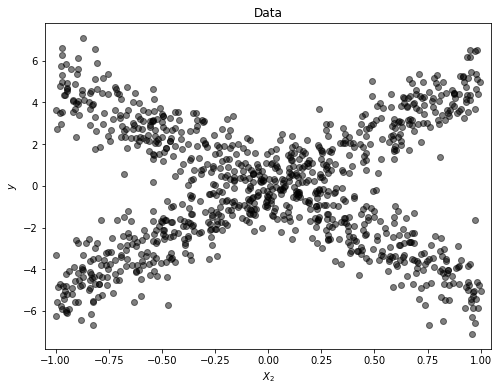

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df.x2, y, c='k', alpha=0.5);

ax.set_xlim(-1.05, 1.05);
ax.set_xlabel('$X_2$');

ax.set_ylabel('$y$');

ax.set_title('Data');

In [10]:
gbm = GradientBoostingRegressor()
gbm.fit(df.values, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [11]:
ice_df = ice(df, 'x2', gbm.predict, num_grid_points=100,column=)

In [41]:
ice_df.head()

data_x2,-0.999355,-0.998730,-0.997923,-0.994951,-0.992327,-0.986840,-0.980633,-0.979303,-0.976915,-0.976721,...,0.976847,0.978473,0.980833,0.981656,0.984729,0.986990,0.988954,0.990760,0.995632,0.999700
x1,-0.007716,-0.276669,-0.656791,0.767920,-0.866474,0.679005,0.061426,-0.055237,0.861915,-0.966740,...,0.905608,0.432996,0.257919,0.540138,0.020051,0.856125,0.925933,-0.631654,0.500868,-0.637415
x3,0.992072,0.218638,-0.192350,0.018764,-0.330735,0.142232,0.423276,-0.920990,-0.383060,-0.760869,...,0.728277,0.485806,0.531413,0.009055,-0.686544,-0.719138,0.378360,-0.432516,0.215544,-0.413526
x2,,,,,,,,,,,,,,,,,,,,,
-0.999355,-6.172103,-4.444391,3.756022,-4.882600,3.408828,-4.814591,-5.095186,2.604396,2.251539,3.385219,...,-5.339871,-5.187211,-5.078500,-5.197344,2.208656,1.490299,-4.744159,3.753291,-5.173632,3.672411
-0.975899,-6.123728,-4.777348,3.978073,-4.834226,3.714490,-4.766217,-5.046812,4.481823,4.128967,3.690881,...,-5.291496,-5.138837,-5.030125,-5.148970,4.086083,3.367726,-4.695785,4.058953,-5.125257,3.978073
-0.959832,-5.706526,-4.469580,3.036882,-4.134862,2.773299,-4.066853,-4.629610,3.606747,3.446225,2.932696,...,-4.615845,-4.721635,-4.612923,-4.708055,3.211007,2.751100,-4.020134,3.117762,-4.708055,3.036882
-0.946763,-5.176667,-3.939721,3.566741,-3.605003,3.303159,-3.536994,-4.099750,4.136606,3.976085,3.462555,...,-4.085985,-4.191776,-4.083064,-4.178196,3.740867,3.280960,-3.490274,3.647621,-4.178196,3.566741
-0.918943,-5.176667,-3.939721,3.566741,-3.605003,3.303159,-3.536994,-4.099750,4.136606,3.976085,3.462555,...,-4.085985,-4.191776,-4.083064,-4.178196,3.740867,3.280960,-3.490274,3.647621,-4.178196,3.566741


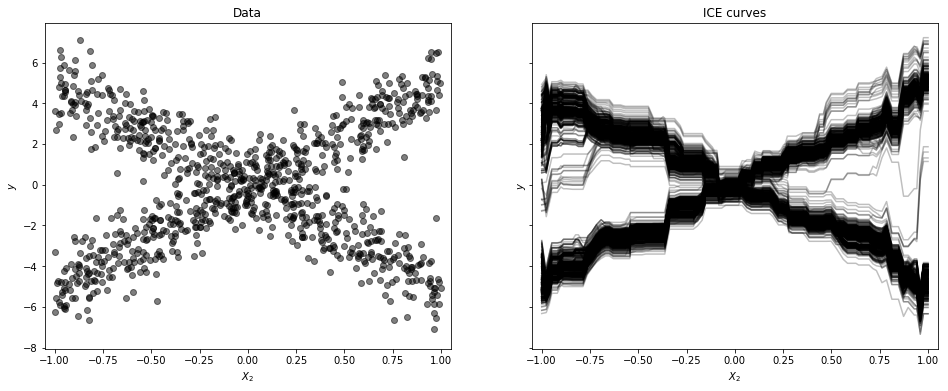

In [42]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(df.x2, y, c='k', alpha=0.5);

data_ax.set_xlim(-1.05, 1.05);
data_ax.set_xlabel('$X_2$');

data_ax.set_ylabel('$y$');

data_ax.set_title('Data');

ice_plot(ice_df, frac_to_plot=1,
         c='k', alpha=0.25,
         ax=ice_ax);

ice_ax.set_xlabel('$X_2$');

ice_ax.set_ylabel('$y$');

ice_ax.set_title('ICE curves');

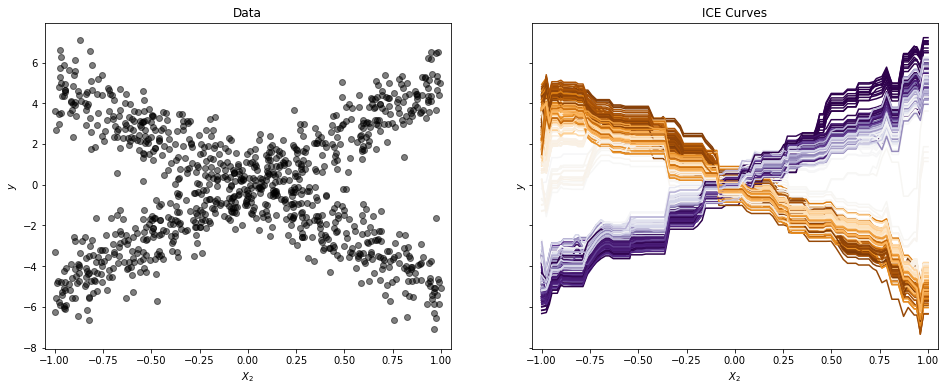

In [46]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(df.x2, y, c='k', alpha=0.5);

data_ax.set_xlim(-1.05, 1.05);
data_ax.set_xlabel('$X_2$');

data_ax.set_ylabel('$y$');

data_ax.set_title('Data');

ice_plot(ice_df, frac_to_plot=1,
         color_by='x3', cmap=PuOr,
         ax=ice_ax);

ice_ax.set_xlabel('$X_2$');

ice_ax.set_ylabel('$y$');

ice_ax.set_title('ICE Curves');

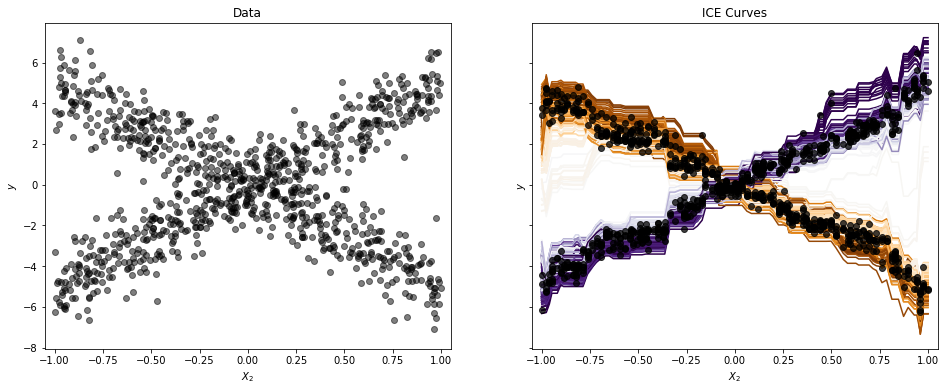

In [44]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(df.x2, y, c='k', alpha=0.5);

data_ax.set_xlim(-1.05, 1.05);
data_ax.set_xlabel('$X_2$');

data_ax.set_ylabel('$y$');

data_ax.set_title('Data');

ice_plot(ice_df, frac_to_plot=1,
         plot_points=True, point_kwargs={'color': 'k', 'alpha': 0.75},
         color_by='x3', cmap=PuOr,
         ax=ice_ax);

ice_ax.set_xlabel('$X_2$');

ice_ax.set_ylabel('$y$');

ice_ax.set_title('ICE Curves');

### Advantages

-  Individual conditional expectation curves are **even more intuitive to understand** than partial dependence plots: One line    represents the predictions for one instance when we vary the feature of interest.
-  In contrast to partial dependence plots they can **uncover heterogeneous relationships**.

### Disadvantages

-  ICE curves **can only display one feature meaningfully**, because two features would require drawing multiple, overlaying surfaces and there is no way you would still see anything in the plot.
-  ICE curves suffer from the same problem as PDPs: When the feature of interest is correlated with the other features, then **not all points in the lines might be valid data points** according to the joint feature distribution.
-  When many ICE curves are drawn the plot can become overcrowded and you don’t see anything any more. The solution: either add some transparency to the lines or only draw a sample of the lines.
-  In ICE plots it might **not be easy to see the average**. This has a simple solution: just combine individual conditional expectation curves with the partial dependence plot.